# Iris 1

Explorando extração de _features_ a partir do dataset da `iris`.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from statsmodels.robust.scale import mad

irisDS = load_iris()
print(irisDS.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


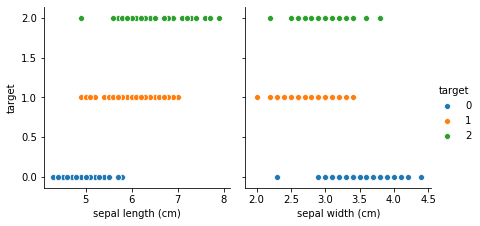

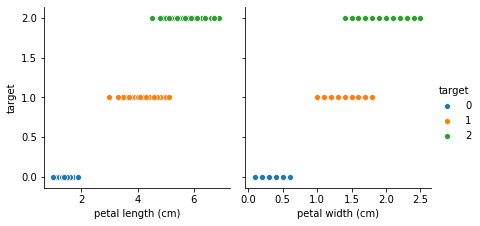

In [2]:
irisDF = pd.DataFrame(data=irisDS.data, columns=irisDS.feature_names)

irisDF['target'] = irisDS.target
sns.pairplot(
    data=irisDF,
    hue='target',
    x_vars=['sepal length (cm)', 'sepal width (cm)'],
    y_vars=['target'],
    height=3
)
sns.pairplot(
    data=irisDF,
    hue='target',
    x_vars=['petal length (cm)', 'petal width (cm)'],
    y_vars=['target'],
    height=3
)
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


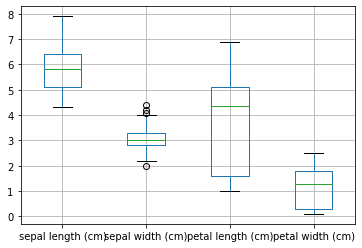

In [3]:
irisDF.pop('target')
irisDF.boxplot()
irisDF.describe()

,mean,std,meanAD,medianAD,skew,kurt
count,150.00000,150.000000,150.000000,150.000000,1.500000e+02,150.000000
mean,3.46450,2.081098,1.663833,2.333616,1.189493e-01,-2.328203
std,0.78094,0.237513,0.227927,0.346609,1.912905e-01,1.477575
min,2.10000,1.544884,1.125000,1.408472,-3.856340e-01,-5.547612
25%,2.67500,1.913112,1.525000,2.149773,-1.234104e-15,-3.485510
50%,3.57500,2.064782,1.650000,2.298033,1.171870e-01,-2.212027
75%,4.06250,2.190172,1.775000,2.520424,2.554889e-01,-1.199953
max,5.10000,2.821790,2.425000,3.484115,8.612781e-01,1.276792


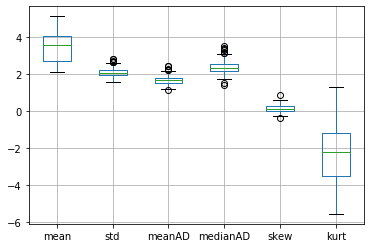

In [4]:
extractDF = pd.DataFrame()
extractDF['mean'] = irisDF.mean(axis=1)         # média
extractDF['std'] = irisDF.std(axis=1)           # desvio padrão
extractDF['meanAD'] = irisDF.mad(axis=1)        # desvio absoluto (em relação à média)
extractDF['medianAD'] = mad(a=irisDF, axis=1)   # desvio absoluto médio (em relação à mediana)
extractDF['skew'] = irisDF.skew(axis=1)         # assimetria
extractDF['kurt'] = irisDF.kurt(axis=1)         # curtose

extractDF.boxplot()
extractDF.describe()

,mean,std,meanAD,medianAD,skew,kurt,target
0,2.550,2.179449,1.750,2.446294,0.189328,-2.368842,0
1,2.375,2.036950,1.575,2.075643,0.404389,-1.091924,0
2,2.350,1.997498,1.600,2.223903,0.208782,-2.276657,0
3,2.350,1.912241,1.500,2.149773,0.120130,-1.575170,0
4,2.550,2.156386,1.750,2.520424,0.090753,-2.787004,0
...,...,...,...,...,...,...,...
145,4.300,2.021551,1.650,2.149773,0.351514,-2.983606,2
146,3.925,2.075853,1.725,2.298033,0.256478,-3.790103,2
147,4.175,2.046745,1.675,2.372164,0.134795,-3.127297,2
148,4.325,1.791415,1.475,2.075643,-0.146244,-3.387994,2


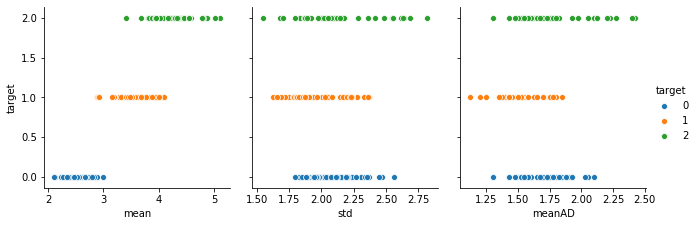

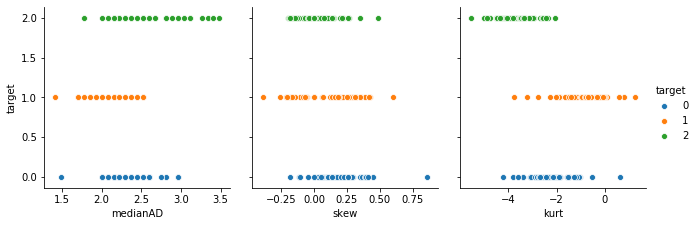

In [5]:
extractDF['target'] = irisDS.target
sns.pairplot(
    data=extractDF,
    hue='target',
    x_vars=['mean', 'std', 'meanAD'],
    y_vars=['target'],
    height=3
)
sns.pairplot(
    data=extractDF,
    hue='target',
    x_vars=['medianAD', 'skew', 'kurt'],
    y_vars=['target'],
    height=3
)
extractDF